# 프로젝트 거래량 데이터 정리
    1. 데이터 불러오기('seoul_apart4.csv')
    2. 데이터 전처리
        - 지역명 컬럼에서 '서울시' 제거, '거래일' 컬럼명 '거래년'으로 변경, 거래년 컬럼에서 2023년 데이터 제거
    3. 거래량 분석 및 시각화
    4. 거래 금액 분석 및 시각화
    5. 강남구, 노원구, 용산구 데이터 분석 및 시각화

------

##### Pandas, Matplotlib, seaborn 참조

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
import seaborn as sns

##### 데이터 불러오기 ('seoul_apart4.csv')

In [2]:
df = pd.read_csv('seoul_apart4.csv')
df.head()

,지역명,법정동,거래일,평수,층,건축년도,거래금액,평당 가격
0,서울시 종로구,내수동,2018,42.6,15,2004,130000,3051.64
1,서울시 종로구,내수동,2018,31.4,5,2003,96000,3057.32
2,서울시 종로구,내수동,2018,37.2,10,2004,118000,3172.04
3,서울시 종로구,내수동,2018,20.3,13,1994,54500,2684.73
4,서울시 종로구,내수동,2018,23.2,11,1994,64000,2758.62


------

### 데이터 전처리

##### 지역명 컬럼에서 '서울시' 제거

In [3]:
df['지역명'] = df['지역명'].astype('str').str.replace('서울시 ', '')
df.head()

,지역명,법정동,거래일,평수,층,건축년도,거래금액,평당 가격
0,종로구,내수동,2018,42.6,15,2004,130000,3051.64
1,종로구,내수동,2018,31.4,5,2003,96000,3057.32
2,종로구,내수동,2018,37.2,10,2004,118000,3172.04
3,종로구,내수동,2018,20.3,13,1994,54500,2684.73
4,종로구,내수동,2018,23.2,11,1994,64000,2758.62


##### 거래일 컬럼명 거래년으로 변경

In [4]:
df.rename(columns={'거래일': '거래년'}, inplace=True)
df.head()

,지역명,법정동,거래년,평수,층,건축년도,거래금액,평당 가격
0,종로구,내수동,2018,42.6,15,2004,130000,3051.64
1,종로구,내수동,2018,31.4,5,2003,96000,3057.32
2,종로구,내수동,2018,37.2,10,2004,118000,3172.04
3,종로구,내수동,2018,20.3,13,1994,54500,2684.73
4,종로구,내수동,2018,23.2,11,1994,64000,2758.62


##### 거래년 컬럼에서  2023 제거

In [5]:
df = df[df['거래년'] != 2023]

------

### 서울시 거래 횟수 데이터 분석 및 시각화

##### 각 년도별 전체 거래 횟수

In [6]:
t_yr = df['거래년'].value_counts()
trans_yr = pd.DataFrame(t_yr)
trans_yr.columns = ['거래 횟수']
trans_yr

,거래 횟수
2015,119691
2016,109949
2017,104837
2018,81163
2019,74548
2020,64335
2021,35078
2022,22324


##### 거래 횟수 시각화

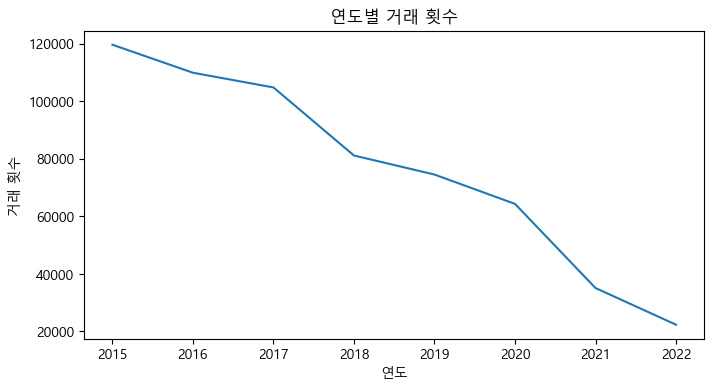

In [7]:
plt.figure(figsize=(8,4))
t_yr.sort_index().plot(kind='line', title='연도별 거래 횟수',  rot=0)
plt.xlabel('연도')
plt.ylabel('거래 횟수')
plt.show()

- 서울시 거래 횟수는 2015년 11,961 회에서 2022년 22,324 회로 약 81.5% 감소하였다.

------

##### 각 구별 거래 횟수

In [8]:
trans_yr_gu = df.groupby(['지역명', '거래년']).size().unstack(fill_value=0)
trans_yr_gu.reset_index(inplace=True)
trans_yr_gu.columns = ['지역명'] + trans_yr_gu.columns[1:].astype(str).tolist()
# 합계를 나타냄
trans_yr_gu['합계'] = trans_yr_gu.loc[:, '2015':'2022'].sum(axis=1) 
trans_yr_gu.head()

,지역명,2015,2016,2017,2018,2019,2020,2021,2022,합계
0,강남구,7326,6712,7262,3513,4614,2564,1795,1432,35218
1,강동구,6246,5883,6155,3789,4081,3287,1664,998,32103
2,강북구,2551,1941,1818,1981,1391,1783,743,399,12607
3,강서구,8332,7100,5902,5168,3740,4588,2363,1192,38385
4,관악구,3881,3358,3340,2855,2295,2104,1257,742,19832


##### 합계 상위 5개 지역

In [9]:
top_trans_gu = trans_yr_gu.sort_values(by = '합계', ascending= False).head()
top_trans_gu.reset_index(drop=True, inplace=True)
top_trans_gu

,지역명,2015,2016,2017,2018,2019,2020,2021,2022,합계
0,노원구,11730,10961,10032,8553,7276,7150,3143,1647,60492
1,송파구,7519,7552,8150,4606,5782,3465,1724,1338,40136
2,강서구,8332,7100,5902,5168,3740,4588,2363,1192,38385
3,강남구,7326,6712,7262,3513,4614,2564,1795,1432,35218
4,구로구,6109,5642,4917,4560,3462,3916,2171,1351,32128


##### 상위 5개 지역 연도별 거래 횟수 상승 하락률 

In [10]:
top_trans_gu_1 = top_trans_gu.copy()
top_trans_gu_1.drop(columns=['합계'], inplace=True)

In [11]:
top_trans_gu_diff = top_trans_gu_1.set_index('지역명').transpose().pct_change().transpose().fillna(0) * 100

top_trans_gu_diff.reset_index(inplace = True)
top_trans_gu_diff_1 = top_trans_gu_diff.drop(columns = ['2015'])
top_trans_gu_diff_1.round(2)

,지역명,2016,2017,2018,2019,2020,2021,2022
0,노원구,-6.56,-8.48,-14.74,-14.93,-1.73,-56.04,-47.60
1,송파구,0.44,7.92,-43.48,25.53,-40.07,-50.25,-22.39
2,강서구,-14.79,-16.87,-12.44,-27.63,22.67,-48.50,-49.56
3,강남구,-8.38,8.19,-51.62,31.34,-44.43,-29.99,-20.22
4,구로구,-7.64,-12.85,-7.26,-24.08,13.11,-44.56,-37.77


- 노원구: 매년 하락하는 추세, **20년도가 -1.73%** 로 하락률 가장 낮음, **21년도가 -56%** 로 하락률 가장 높음
- 송파구: **17년에 약 8%** 가량의 상승, **19년도가 25.53%** 로 상승률이 가장 높음, **21년도가 -50.25%** 로 하락률 가장 높음
- 강서구: 20년 제외 매년 하락하는 추세, **20년도가 22.67%** 로 상승률이 가장 높음, **21년도가 -48.5%** 로 하락률 가장 높음
- 강남구: **17년에 약 8.2%** 가량의 상승, **19년도가 31.34%** 로 상승률이 가장 높음, **18년도가 -51.62%** 로 하락률 가장 높음
- 구로구: 매년 하락하는 추세, **20년도가 13.11%** 로 상승률 가장 높음, **21년도가 -44.56%** 로 하락률 가장 높음

##### 노원,강서,구로가 비슷한 추세를 보이고 강남,송파가 비슷한 추세를 보임

##### 상위 5개 지역 거래 횟수 시각화

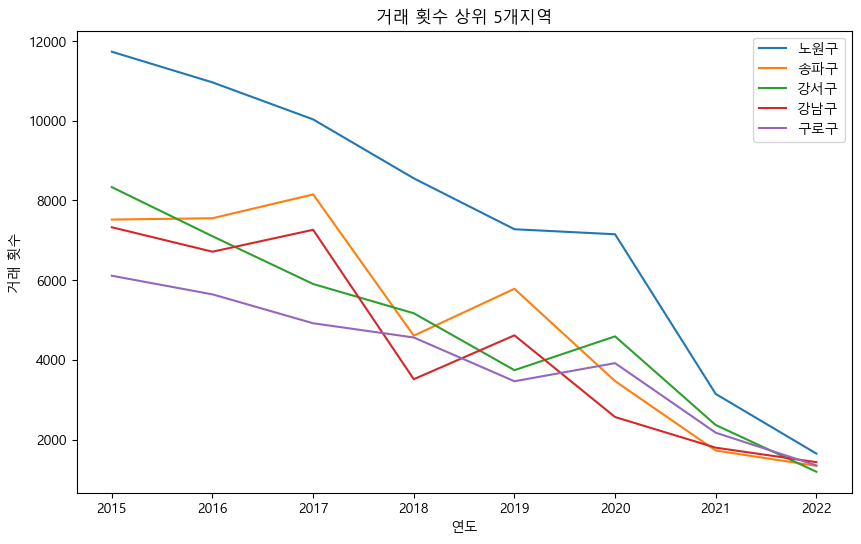

In [12]:
plt.figure(figsize=(10, 6))
for index, row in top_trans_gu_1.iterrows():
    plt.plot(row.index[1:], row.values[1:], label=row['지역명'])
plt.xlabel('연도')
plt.ylabel('거래 횟수')
plt.title('거래 횟수 상위 5개지역')
plt.legend()
plt.grid(False)

plt.show()

- 각 구별 거래 횟수는 **노원구**가 2015년 부터 22년까지 60,492회로 가장 많았다.
- 상위 5개 지역은 **노원,송파,강서,강남,구로** 순이였고 이들의 거래량은 **하락**하는 추세를 보인다.
- **송파,강남**은 2017년 그리고 2019년에 거래량이 상승한 반면 **노원,강서,구로**는 2020년에 거래 횟수가 전년 대비 상승하였다.

------

### 서울시 거래금액 연도별 평균 금액 데이터 분석 및 시각화

##### 각 연도별 거래 금액 평균

In [13]:
average_price_by_year = df.groupby('거래년')['거래금액'].mean().reset_index()
average_price_by_year = average_price_by_year.round(2)
average_price_by_year

,거래년,거래금액
0,2015,47724.24
1,2016,53683.94
2,2017,61969.32
3,2018,65936.56
4,2019,82219.04
5,2020,80602.56
6,2021,102404.63
7,2022,99539.88


##### 거래금액 평균 시각화

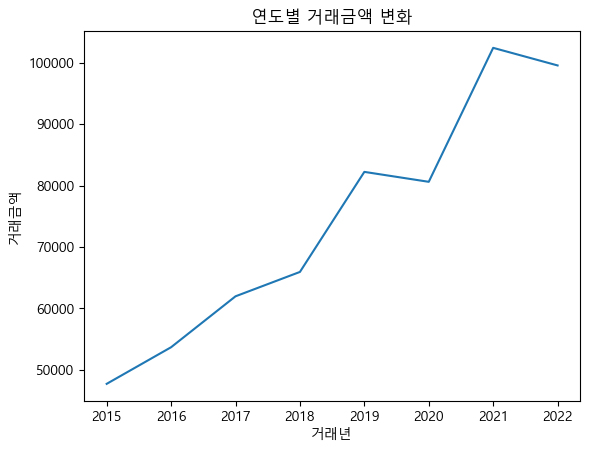

In [14]:
plt.plot(average_price_by_year['거래년'], average_price_by_year['거래금액'])

plt.title('연도별 거래금액 변화')
plt.xlabel('거래년')
plt.ylabel('거래금액')

plt.show()

- 서울시 평균거래 금액는 2015년 **47,724.24**에서 2022년 **99,539.88**로 약 **108.6%** 상승하였다. 
- 큰 폭으로 상승한 연도는 **2019년 24.7%** 그리고 **2021년 27%** 이다.

##### 각 연도별 평균 평당 가격

In [15]:
average_price_pyung_by_year = df.groupby('거래년')['평당 가격'].mean().reset_index()
average_price_pyung_by_year = average_price_pyung_by_year.round(2)
average_price_pyung_by_year

,거래년,평당 가격
0,2015,2022.64
1,2016,2232.05
2,2017,2547.35
3,2018,2716.92
4,2019,3449.84
5,2020,3500.83
6,2021,4558.62
7,2022,4530.44


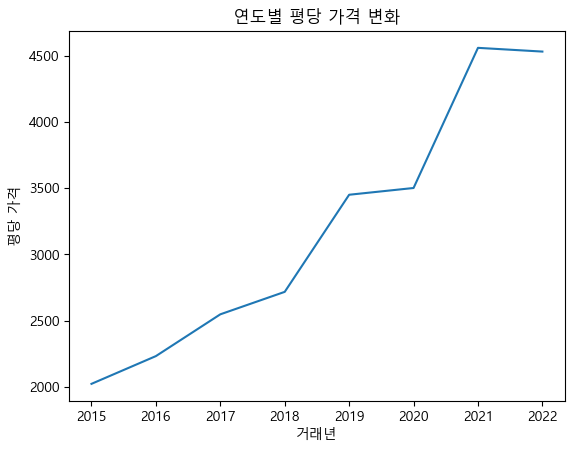

In [16]:
plt.plot(average_price_pyung_by_year['거래년'], average_price_pyung_by_year['평당 가격'])

plt.title('연도별 평당 가격 변화')
plt.xlabel('거래년')
plt.ylabel('평당 가격')

plt.show()

- 평균 거래 금액과 거의 일치한 추세를 보임

-------

##### 각 구별 평균 거래 금액

In [119]:
avg_price_by_gu = df.groupby(['거래년', '지역명'])['거래금액'].mean().reset_index()
avg_price_by_gu = avg_price_by_gu.pivot_table(index='지역명', columns='거래년', values='거래금액', aggfunc='mean').reset_index()
avg_price_by_gu.columns = ['지역명'] + [str(year) for year in avg_price_by_gu.columns[1:]]
avg_price_by_gu.round(2).head()

,지역명,2015,2016,2017,2018,2019,2020,2021,2022
0,강남구,94134.51,107776.14,127019.62,153672.68,180095.86,177802.68,203518.40,212969.72
1,강동구,45858.42,50520.47,58075.68,65126.45,74076.30,80868.31,91686.60,85548.93
2,강북구,32536.23,35748.03,37446.27,42260.59,46816.31,54555.02,69249.17,58450.88
3,강서구,36267.45,42420.88,46888.60,53151.78,60400.87,65879.28,79442.80,65755.53
4,관악구,36535.47,38192.74,40783.62,47180.87,53569.42,60641.77,71550.62,62635.92


##### 2022년 기준 평균 거래 금액 상위 5개 지역

In [18]:
top_avg_price_gu = avg_price_by_gu.sort_values(by='2022', ascending=False).round(2).head()
top_avg_price_gu.reset_index(drop=True, inplace=True)
top_avg_price_gu

,지역명,2015,2016,2017,2018,2019,2020,2021,2022
0,용산구,77575.01,96298.84,107544.07,131332.16,151509.53,148502.10,206116.84,217742.50
1,서초구,95730.72,107669.84,120565.59,146842.09,165419.34,168641.83,205197.42,217199.71
2,강남구,94134.51,107776.14,127019.62,153672.68,180095.86,177802.68,203518.40,212969.72
3,송파구,66842.07,74042.40,85085.53,99347.42,120171.00,126033.91,155904.51,151364.53
4,성동구,52795.60,58172.53,67096.28,83427.04,96468.78,109494.17,144730.48,146727.23


##### 상위 5개 지역 연도별 거래 금액 상승 하락률 

In [19]:
top_avg_price_gu_diff = top_avg_price_gu.set_index('지역명').transpose().pct_change().transpose().fillna(0) * 100

top_avg_price_gu_diff.reset_index(inplace = True)
top_avg_price_gu_diff_1 = top_avg_price_gu_diff.drop(columns = ['2015'])
top_avg_price_gu_diff_1.round(2)

,지역명,2016,2017,2018,2019,2020,2021,2022
0,용산구,24.14,11.68,22.12,15.36,-1.98,38.80,5.64
1,서초구,12.47,11.98,21.79,12.65,1.95,21.68,5.85
2,강남구,14.49,17.86,20.98,17.19,-1.27,14.46,4.64
3,송파구,10.77,14.91,16.76,20.96,4.88,23.70,-2.91
4,성동구,10.18,15.34,24.34,15.63,13.50,32.18,1.38


- 용산구: 상승하는 추세, **20년도에 -1.98%** 로 하락함, 상승률이 **21년도 38.8%** 로 가장 높음
</br></br>
- 서초구: 매년 상승하는 추세, 상승률이 **20년도에 1.95%** 로 가장 낮음, 상승률이 **18년도 20.39%** 로 가장 높음</br></br>
- 강남구: 상승하는 추세, **20년도에 -1.27%** 로 하락함, 상승률이 **18년도 20.98%** 로 가장 높음</br></br>
- 송파구: 19년도 까지 매해 상승률이 증가함, **20년도에 상승률이 4.88%** 로 낮아짐, </br> **21년도 23.7%** 로 가장 높음, **22년도에 -2.91%** 로 가격이 하락함</br></br>
- 성동구: 매년 상승하는 추세, 18년도 까지 매해 상승률이 증가함, 19년도 부터 20년도까지 상승률이 낮아짐, </br> 21년도 **32.18	%** 로 가장 높음, **22년도에 상승률이 1.38%** 로 낮아짐

##### 상위 5개 모두 15년 대비 가격이 상승함
##### 강남구를 제외한 나머지 4개 구는 21년이 최고 상승률을 기록한 해였음
##### 성동구를 제외한 나머지 4개 구는 20년 그리고 22년에 상승률이 다른 해에 비해 저조했음

#### 상위 5개 지역 평균 거래 금액 시각화

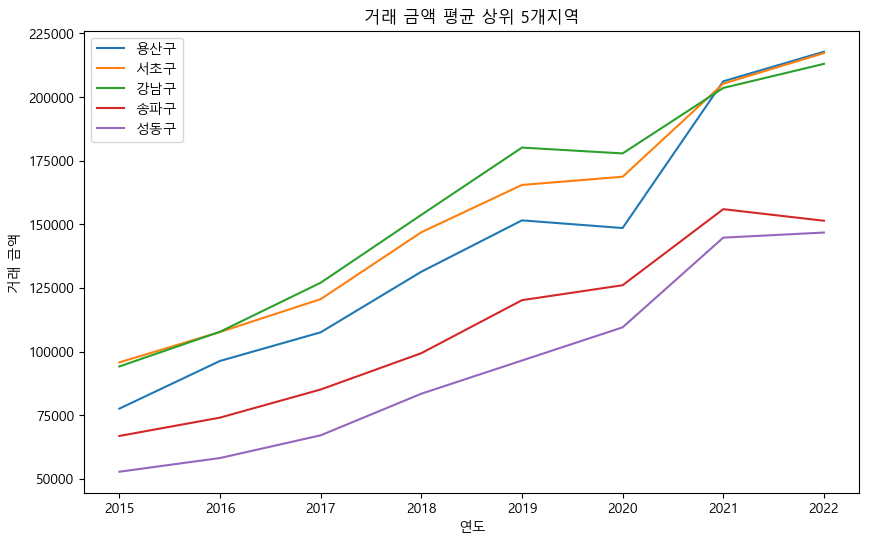

In [20]:
plt.figure(figsize=(10, 6))
for index, row in top_avg_price_gu.iterrows():
    plt.plot(row.index[1:], row.values[1:], label=row['지역명'])
plt.xlabel('연도')
plt.ylabel('거래 금액')
plt.title('거래 금액 평균 상위 5개지역')
plt.legend()
plt.grid(False)

plt.show()

- 각 구별 거래 금액 평균은 22년 기준 **용산구**가 217,742.5으로 가장 높았음
- 상위 5개 지역은 **용산,서초,강남,송파,성동** 순이였고 이들의 거래금액 평균은 상승하는 추세를 보인다
- 상위 5개 구의 평당 가격 평균은 15년 대비 큰 폭으로 **상승함**
- 강남구를 제외한 4개 구는 **21년**에 최고 상승률을 기록함
- 성동구를 제외한 나머지 4개 구는 **20,22년**에 상승률이 다른 해에 비해 **저조**했음

------

##### 각 구별 평균 평당 가격

In [21]:
avg_price_pyung_by_gu = df.groupby(['거래년', '지역명'])['평당 가격'].mean().reset_index()
avg_price_pyung_by_gu = avg_price_pyung_by_gu.pivot_table(index='지역명', columns='거래년', values='평당 가격', aggfunc='mean').reset_index()
avg_price_pyung_by_gu.columns = ['지역명'] + [str(year) for year in avg_price_pyung_by_gu.columns[1:]]
avg_price_pyung_by_gu.round(2).head()

,지역명,2015,2016,2017,2018,2019,2020,2021,2022
0,강남구,3771.29,4233.93,4846.56,5642.55,6793.18,6828.66,7679.50,7685.64
1,강동구,2093.15,2281.59,2468.12,2839.01,3335.72,3711.80,4697.27,4384.27
2,강북구,1542.65,1586.05,1701.84,1863.67,2201.05,2466.24,3164.74,3012.81
3,강서구,1658.08,1920.40,2156.61,2410.27,2818.78,3125.51,3908.08,3442.09
4,관악구,1637.82,1793.96,1888.24,2123.49,2507.52,2804.72,3632.84,3459.31


##### 2022년 기준 평균 평당 가격 상위 5개 지역

In [22]:
top_avg_price_pyung_by_gu = avg_price_pyung_by_gu.sort_values(by='2022', ascending=False).round(2).head()
top_avg_price_pyung_by_gu.reset_index(drop=True, inplace=True)
top_avg_price_pyung_by_gu

,지역명,2015,2016,2017,2018,2019,2020,2021,2022
0,서초구,3227.41,3630.88,4093.68,4830.79,5807.53,6012.51,7265.41,7742.07
1,강남구,3771.29,4233.93,4846.56,5642.55,6793.18,6828.66,7679.50,7685.64
2,용산구,2713.14,3003.75,3339.89,3958.91,4844.66,5161.00,6417.78,6571.14
3,송파구,2845.52,3079.77,3404.47,3982.22,4765.08,5159.42,6646.58,6491.86
4,성동구,2162.56,2378.71,2742.09,3481.17,4116.76,4691.06,6056.31,6098.71


##### 상위 5개 지역 연도별 평당 가격 상승 하락률 

In [23]:
top_avg_price_pyung_by_gu_diff = top_avg_price_pyung_by_gu.set_index('지역명').transpose().pct_change().transpose().fillna(0) * 100

top_avg_price_pyung_by_gu_diff.reset_index(inplace = True)
top_avg_price_pyung_by_gu_diff_1 = top_avg_price_pyung_by_gu_diff.drop(columns = ['2015'])
top_avg_price_pyung_by_gu_diff_1.round(2)

,지역명,2016,2017,2018,2019,2020,2021,2022
0,서초구,12.50,12.75,18.01,20.22,3.53,20.84,6.56
1,강남구,12.27,14.47,16.42,20.39,0.52,12.46,0.08
2,용산구,10.71,11.19,18.53,22.37,6.53,24.35,2.39
3,송파구,8.23,10.54,16.97,19.66,8.28,28.82,-2.33
4,성동구,10.00,15.28,26.95,18.26,13.95,29.10,0.70


- **서초구**: 매년 상승하는 추세, 19년도 까지 매해 상승률이 증가함, 20년도에 상승률이 **3.5%** 로 낮아짐, </br>21년도 **20.84%** 로 가장 높음, **22년도에** 다시 **6.56%** 로 낮아짐
- **강남구**: 매년 상승하는 추세, 19년도 까지 매해 상승률이 증가함, 20년도에 상승률이 **0.52%** 로 낮아짐, </br>19년도 **20.39%** 로 가장 높음, **22년도에** 다시 **0.08%** 로 정체됨
- **용산구**: 매년 상승하는 추세, 19년도 까지 매해 상승률이 증가함, 20년도에 상승률이 **6.53%** 로 낮아짐, </br> 21년도 **24.35%** 로 가장 높음, **22년도에** 다시 **2.39%** 로 낮아짐
- **송파구**: 19년도 까지 매해 상승률이 증가함, 20년도에 상승률이 **8.28%** 로 낮아짐, </br> 21년도 **28.82%** 로 가장 높음, **22년도에 -2.33%** 로 가격이 하락함
- **성동구**: 매년 상승하는 추세, 18년도 까지 매해 상승률이 증가함, 19년도 부터 20년도까지 상승률이 낮아짐, </br> 21년도 **29.10%** 로 가장 높음, **22년도에 상승률이 0.7%** 로 정체됨

##### 송파구를 제외한 나머지 4개 구는 매해 상승하는 추세를 보임
##### 상위 5개 모두 19년까지 매해 상승률이 증가함
##### 강남구를 제외한 나머지 4개 구는 21년이 최고 상승률을 기록한 해였음
##### 상위 5개 모두 20년 그리고 22년에 상승률이 다른 해에 비해 저조했음

#### 상위 5개 지역 평균 거래 금액 시각화

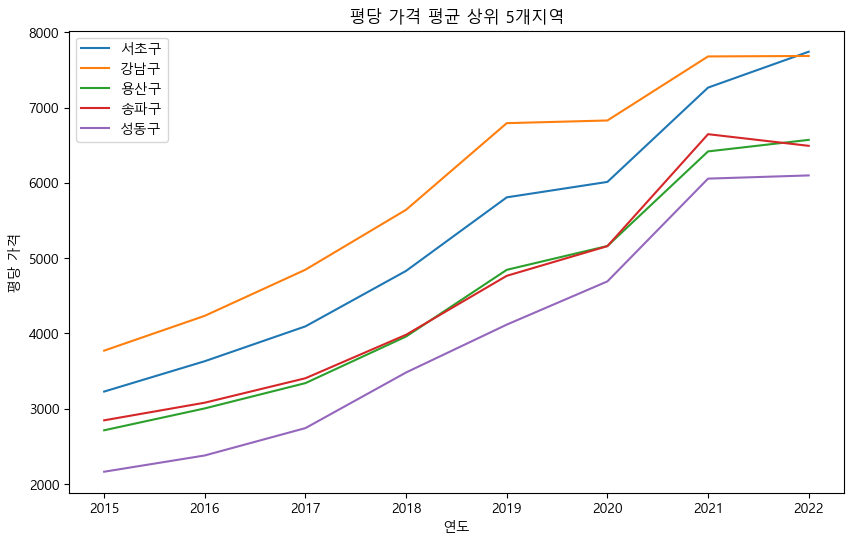

In [24]:
plt.figure(figsize=(10, 6))
for index, row in top_avg_price_pyung_by_gu.iterrows():
    plt.plot(row.index[1:], row.values[1:], label=row['지역명'])
plt.xlabel('연도')
plt.ylabel('평당 가격')
plt.title('평당 가격 평균 상위 5개지역')
plt.legend()
plt.grid(False)

plt.show()

- 각 구별 평당 가격 평균은 22년 기준 **서초구**가 7,742.07으로  가장 높았음
- 상위 5개 지역은 **서초,강남,용산,송파,성동** 순이였고 이들의 평당 가격은 **상승**하는 추세를 보인다
- 상위 5개 구의 평당 가격 평균은 15년 대비 큰 폭으로 **상승함**
- 강남구를 제외한 4개 구는 **21년**에 최고 상승률을 기록함
- 상위 5개 구 모두 **20,22년**에 상승률이 다른해에 비해 **저조**했음

------

## 거래량, 거래 금액 데이터 분석 결과

1. 거래량
    1. 서울시 거래량:
        - 서울시 아파트 거래량은 하락하는 추세이다.
    2. 각 구별 거래량:
        - 상위 5개 지역: 노원,송파,강서,강남,구로
        - 가장 거래 횟수가 많은 지역: 노원구
        - 같은 특성을 보이는 지역:
            - 노원,송파,구로: 2020년에 거래 횟수가 전년 대비 상승함
            - 송파,강남: 2019년에 거래 횟수가 전년 대비 상승함
 2. 거래액
     1. 서울시 거래액
         - 서울시 아파트 평균 거래 금액은 상승하는 추세이다.
         - 큰 폭으로 상승한 연도는 19년 그리고 21년이다.
     2. 각 구별 거래액
         - 평균 거래 금액
             - 상위 5개 지역: 용산,서초,강남,송파,성동
             - 22년 기준 가장 금액이 높은 지역: 용산구
             - 강남구를 제외한 4개 구는 21년에 최고 상승률을 기록함
             - 성동구를 제외한 나머지 4개 구는 20,22년에 상승률이 다른 해에 비해 저조했음
         - 평균 평당 가격
             - 상위 5개 지역: 서초,강남,용산,송파,성동
             - 22년 기준 가장 금액이 높은 지역: 서초구
             - 강남구를 제외한 4개 구는 21년에 최고 상승률을 기록함
             - 성동구를 제외한 나머지 4개 구는 20,22년에 상승률이 다른 해에 비해 저조했음
             

------

## 분석 결과를 바탕으로 세부 분석할 지역 선정

1. 거래량과  거래액 두 부분에서 상위 5개 지역에 해당된 지역
    - 강남구, 송파구
2. 가장 거래량이 많고 강남구, 송파구와 다른 특성을 보이는 지역
    - 노원구
3. 22년 기준 평균 거래 금액이 가장 높았던 지역
    - 용산구
#### 해당 조건에 맞춰 선정된 4개의 지역: 강남구, 송파구, 노원구, 용산구

## 세부 분석을 진행할 연도 선정

- 선정된 4개 지역의 거래량, 거래액의 변동이 가장 심했던 연도
    - 2019년: 송파구, 강남구의 거래량 상승/ 강남구 거래액 상승률이 가장 높았음
    - 2020년: 노원구의 거래량이 전년 대비 상승함
    - 2021년: 송파구, 용산구의 거래액 상승률이 가장 높았음
#### 해당 기준에 맞춰 선정된 3개의 년도: 2019, 2020, 2021    

------

# 4개 지역 거래 데이터 세부 분석

------

## 강남구

### 강남구 19,20,21년도 평수별 거래비중 증감률 비교

In [25]:
gangnam = df[(df['지역명'] == '강남구') & ((df['거래년'] == 2019)| (df['거래년'] == 2020)| (df['거래년'] == 2021))]
gangnam.reset_index(drop=True, inplace=True)
gangnam

,지역명,법정동,거래년,평수,층,건축년도,거래금액,평당 가격
0,강남구,개포동,2019,12.0,8,1992,88200,7350.00
1,강남구,개포동,2019,40.4,12,1984,197000,4876.24
2,강남구,개포동,2019,40.1,6,1993,102000,2543.64
3,강남구,개포동,2019,15.1,14,1992,101900,6748.34
4,강남구,개포동,2019,12.9,3,1982,140500,10891.47
...,...,...,...,...,...,...,...,...
8968,강남구,도곡동,2021,40.8,13,2006,435000,10661.76
8969,강남구,도곡동,2021,49.9,3,2003,415000,8316.63
8970,강남구,도곡동,2021,31.5,10,1983,211000,6698.41
8971,강남구,도곡동,2021,52.2,8,1999,293000,5613.03


In [26]:
gangnam_copy = gangnam.copy()
gangnam_copy['평 범주'] = pd.cut(gangnam['평수'], bins=[0, 10, 20, 30, 40, 50, 60, 200],
       labels=['1-10','11-20', '21-30', '31-40', '41-50', '51-60', '61 이상'],
       right=True)
gangnam_copy.head()

,지역명,법정동,거래년,평수,층,건축년도,거래금액,평당 가격,평 범주
0,강남구,개포동,2019,12.0,8,1992,88200,7350.00,11-20
1,강남구,개포동,2019,40.4,12,1984,197000,4876.24,41-50
2,강남구,개포동,2019,40.1,6,1993,102000,2543.64,41-50
3,강남구,개포동,2019,15.1,14,1992,101900,6748.34,11-20
4,강남구,개포동,2019,12.9,3,1982,140500,10891.47,11-20


In [27]:
count_per_category_year_total_gangnam = gangnam_copy.groupby(['거래년', '평 범주']).size().reset_index(name='거래 횟수')

mean_price_per_category_year_total_gangnam = gangnam_copy.groupby(['거래년', '평 범주'])['거래금액'].mean().reset_index(name='거래금액')

total_gangnam = pd.merge(count_per_category_year_total_gangnam, mean_price_per_category_year_total_gangnam, on=['거래년', '평 범주'])

total_transactions_total_gangnam = total_gangnam.groupby('거래년')['거래 횟수'].sum()

total_gangnam['거래 비중'] = total_gangnam.apply(lambda row: row['거래 횟수'] / total_transactions_total_gangnam[row['거래년']]*100, axis=1)
total_gangnam = total_gangnam.round(2)
total_gangnam.head()

,거래년,평 범주,거래 횟수,거래금액,거래 비중
0,2019,1-10,166,56129.02,3.60
1,2019,11-20,1217,125313.45,26.38
2,2019,21-30,1671,172198.55,36.22
3,2019,31-40,818,213773.78,17.73
4,2019,41-50,507,256606.11,10.99


In [28]:
total_gangnam_pivot = total_gangnam.pivot(index='평 범주', columns='거래년', values='거래 비중').reset_index()
total_gangnam_pivot

거래년,평 범주,2019,2020,2021
0,1-10,3.60,6.44,9.92
1,11-20,26.38,26.99,28.64
2,21-30,36.22,35.92,32.59
3,31-40,17.73,16.97,13.98
4,41-50,10.99,8.70,8.25
5,51-60,3.27,3.63,3.01
6,61 이상,1.82,1.37,3.62


#### 연도별 거래 비중 시각화

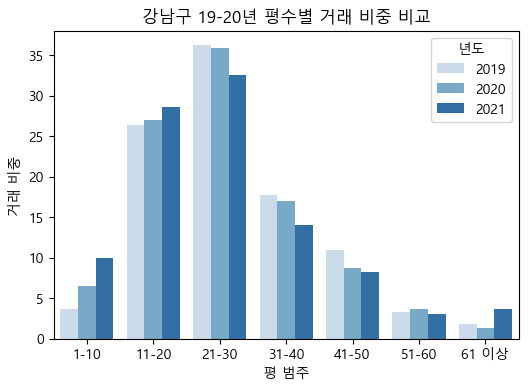

In [116]:
total_gangnam_melted = pd.melt(total_gangnam_pivot, id_vars='평 범주', var_name='년도', value_name='거래 비중')

# seaborn을 사용하여 시각화
plt.figure(figsize=(6, 4))
sns.barplot(x='평 범주', y='거래 비중', hue='년도', data=total_gangnam_melted, palette='Blues')
plt.title('강남구 19-20년 평수별 거래 비중 비교')
plt.savefig('강남구 19-20년 평수별 거래 비중 비교.png')
plt.show()

- 21-30평대 아파트가 30%대로 가장 거래 비중이 높고 그 다음으로 11-20평대 아파트가 약 28%로 높다.
- 1-20평대 아파트의 거래 비중이 증가하는 추세이다
- 21-60평대 아파트는 거래 비중이 줄어드는 추세이다
- 반면, 60평대 이상 아파트는 거래 비중이 증가하는 추세이다

### 강남구 19,20,21년도 층별 거래비중 증감률 비교

In [99]:
gangnam_copy_ch = gangnam.copy()
gangnam_copy_ch['층 범주'] = pd.cut(gangnam_copy_ch['층'], bins=[0, 5, 10, 15, 20, 25, 30, 100],
       labels=['1-5','6-10', '11-15', '16-20', '21-25', '26-30', '31 이상'],
       right=True)
gangnam_copy_ch

,지역명,법정동,거래년,평수,층,건축년도,거래금액,평당 가격,층 범주
0,강남구,개포동,2019,12.0,8,1992,88200,7350.00,6-10
1,강남구,개포동,2019,40.4,12,1984,197000,4876.24,11-15
2,강남구,개포동,2019,40.1,6,1993,102000,2543.64,6-10
3,강남구,개포동,2019,15.1,14,1992,101900,6748.34,11-15
4,강남구,개포동,2019,12.9,3,1982,140500,10891.47,1-5
...,...,...,...,...,...,...,...,...,...
8968,강남구,도곡동,2021,40.8,13,2006,435000,10661.76,11-15
8969,강남구,도곡동,2021,49.9,3,2003,415000,8316.63,1-5
8970,강남구,도곡동,2021,31.5,10,1983,211000,6698.41,6-10
8971,강남구,도곡동,2021,52.2,8,1999,293000,5613.03,6-10


In [100]:
count_total_gangnam_ch = gangnam_copy_ch.groupby(['거래년', '층 범주']).size().reset_index(name='층 분포')

mean_total_gangnam_ch = gangnam_copy_ch.groupby(['거래년', '층 범주'])['거래금액'].mean().reset_index(name='거래금액')

total_gangnam_ch = pd.merge(count_total_gangnam_ch, mean_total_gangnam_ch, on=['거래년', '층 범주'])

total_ch_total_gangnam = total_gangnam_ch.groupby('거래년')['층 분포'].sum()

total_gangnam_ch['층 비중'] = total_gangnam_ch.apply(lambda row: row['층 분포'] / total_ch_total_gangnam[row['거래년']]*100, axis=1)
total_gangnam_ch = total_gangnam_ch.round(2)
total_gangnam_ch.head()

,거래년,층 범주,층 분포,거래금액,층 비중
0,2019,1-5,1616,174131.95,35.02
1,2019,6-10,1397,174575.29,30.28
2,2019,11-15,968,179429.08,20.98
3,2019,16-20,340,192220.74,7.37
4,2019,21-25,153,204733.33,3.32


In [101]:
total_gangnam_ch_pivot = total_gangnam_ch.pivot(index='층 범주', columns='거래년', values='층 비중').reset_index()
total_gangnam_ch_pivot

거래년,층 범주,2019,2020,2021
0,1-5,35.02,34.83,34.21
1,6-10,30.28,31.08,29.92
2,11-15,20.98,21.88,22.40
3,16-20,7.37,5.85,5.68
4,21-25,3.32,3.12,2.79
5,26-30,1.02,1.09,2.12
6,31 이상,2.02,2.15,2.90


#### 연도별 거래 비중 시각화

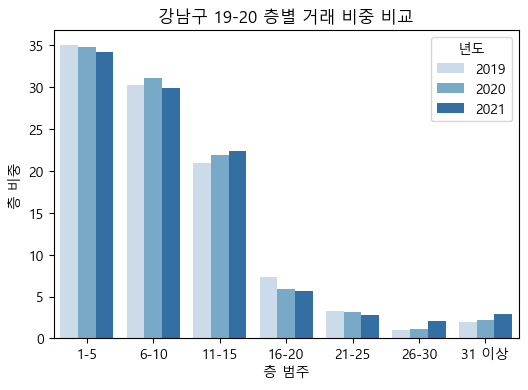

In [115]:
total_gangnam_ch_melted = pd.melt(total_gangnam_ch_pivot, id_vars='층 범주', var_name='년도', value_name='층 비중')

# seaborn을 사용하여 시각화
plt.figure(figsize=(6, 4))
sns.barplot(x='층 범주', y='층 비중', hue='년도', data=total_gangnam_ch_melted,palette='Blues')
plt.title('강남구 19-20 층별 거래 비중 비교')
plt.show()

------

## 노원구

### 노원구 19,20,21년도 평수별 거래비중 증감률 비교

In [103]:
nowon = df[(df['지역명'] == '노원구') & ((df['거래년'] == 2019)| (df['거래년'] == 2020)| (df['거래년'] == 2021))]
nowon.reset_index(drop=True, inplace=True)
nowon

,지역명,법정동,거래년,평수,층,건축년도,거래금액,평당 가격
0,노원구,공릉동,2019,18.2,9,1997,30400,1670.33
1,노원구,공릉동,2019,9.5,15,2001,23000,2421.05
2,노원구,공릉동,2019,15.4,15,1995,28500,1850.65
3,노원구,공릉동,2019,15.4,15,1995,30000,1948.05
4,노원구,공릉동,2019,25.6,4,1996,40200,1570.31
...,...,...,...,...,...,...,...,...
17564,노원구,중계동,2021,12.0,9,1990,59800,4983.33
17565,노원구,중계동,2021,18.0,4,1997,69300,3850.00
17566,노원구,중계동,2021,25.6,5,1999,94000,3671.88
17567,노원구,중계동,2021,11.7,13,1992,51000,4358.97


In [104]:
nowon_copy = nowon.copy()
nowon_copy['평 범주'] = pd.cut(nowon['평수'], bins=[0, 10, 20, 30, 40, 50, 60, 200],
       labels=['1-10','11-20', '21-30', '31-40', '41-50', '51-60', '61 이상'],
       right=True)
# nowon_copy.head()

count_per_category_year_total_nowon = nowon_copy.groupby(['거래년', '평 범주']).size().reset_index(name='거래 횟수')

mean_price_per_category_year_total_nowon = nowon_copy.groupby(['거래년', '평 범주'])['거래금액'].mean().reset_index(name='거래금액')

total_nowon = pd.merge(count_per_category_year_total_nowon, mean_price_per_category_year_total_nowon, on=['거래년', '평 범주'])

total_transactions_total_nowon = total_nowon.groupby('거래년')['거래 횟수'].sum()

total_nowon['거래 비중'] = total_nowon.apply(lambda row: row['거래 횟수'] / total_transactions_total_nowon[row['거래년']]*100, axis=1)
total_nowon = total_nowon.round(2)
total_nowon.head()

,거래년,평 범주,거래 횟수,거래금액,거래 비중
0,2019,1-10,278,25254.14,3.82
1,2019,11-20,4311,36887.67,59.25
2,2019,21-30,2131,54838.87,29.29
3,2019,31-40,454,72678.31,6.24
4,2019,41-50,99,77014.65,1.36


In [105]:
total_nowon_pivot = total_nowon.pivot(index='평 범주', columns='거래년', values='거래 비중').reset_index()
total_nowon_pivot

거래년,평 범주,2019,2020,2021
0,1-10,3.82,2.91,3.88
1,11-20,59.25,63.23,65.61
2,21-30,29.29,26.62,25.49
3,31-40,6.24,5.71,3.79
4,41-50,1.36,1.54,1.24
5,51-60,0.04,0.00,0.00
6,61 이상,0.00,0.00,0.00


#### 연도별 거래 비중 시각화

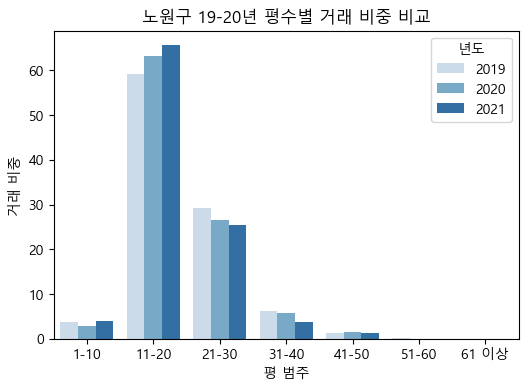

In [112]:
total_nowon_melted = pd.melt(total_nowon_pivot, id_vars='평 범주', var_name='년도', value_name='거래 비중')

# seaborn을 사용하여 시각화
plt.figure(figsize=(6, 4))
sns.barplot(x='평 범주', y='거래 비중', hue='년도', data=total_nowon_melted, palette='Blues')
plt.title('노원구 19-20년 평수별 거래 비중 비교')
plt.savefig('노원구 19-20년 평수별 거래 비중 비교.png')
plt.show()

- 11-20평대 아파트의 거래 비중이 약 65%로 상당수를 차지한다.
- 그 다음으로는 21-30평대 아파트가 약 25%로 11-30평대 아파트가 전체 거래 비중의 90%를 차지한다.
- 11-20평대 아파트의 거래 비중은 매년 상승하는 추세이다.

------

## 용산구

### 용산구 19,20,21년도 평수별 거래비중 증감률 비교

In [107]:
yongsan = df[(df['지역명'] == '용산구') & ((df['거래년'] == 2019)| (df['거래년'] == 2020)| (df['거래년'] == 2021))]
yongsan.reset_index(drop=True, inplace=True)
yongsan

,지역명,법정동,거래년,평수,층,건축년도,거래금액,평당 가격
0,용산구,도원동,2019,18.1,2,2001,80500,4447.51
1,용산구,도원동,2019,34.8,9,2001,108000,3103.45
2,용산구,동자동,2019,45.1,24,2013,150000,3325.94
3,용산구,동자동,2019,38.7,20,2013,118600,3064.60
4,용산구,서빙고동,2019,50.5,3,1985,225000,4455.45
...,...,...,...,...,...,...,...,...
3260,용산구,한남동,2021,73.9,2,2019,900000,12178.62
3261,용산구,한남동,2021,81.4,2,2020,1200000,14742.01
3262,용산구,한남동,2021,9.7,5,1974,59500,6134.02
3263,용산구,한남동,2021,11.4,11,2004,80000,7017.54


In [108]:
yongsan_copy = yongsan.copy()
yongsan_copy['평 범주'] = pd.cut(yongsan['평수'], bins=[0, 10, 20, 30, 40, 50, 60, 200],
       labels=['1-10','11-20', '21-30', '31-40', '41-50', '51-60', '61 이상'],
       right=True)
# yongsan_copy.head()

count_per_category_year_total_yongsan = yongsan_copy.groupby(['거래년', '평 범주']).size().reset_index(name='거래 횟수')

mean_price_per_category_year_total_yongsan = yongsan_copy.groupby(['거래년', '평 범주'])['거래금액'].mean().reset_index(name='거래금액')

total_yongsan = pd.merge(count_per_category_year_total_yongsan, mean_price_per_category_year_total_yongsan, on=['거래년', '평 범주'])

total_transactions_total_yongsan = total_yongsan.groupby('거래년')['거래 횟수'].sum()

total_yongsan['거래 비중'] = total_yongsan.apply(lambda row: row['거래 횟수'] / total_transactions_total_yongsan[row['거래년']]*100, axis=1)
total_yongsan = total_yongsan.round(2)
total_yongsan.head()

,거래년,평 범주,거래 횟수,거래금액,거래 비중
0,2019,1-10,50,25547.00,3.35
1,2019,11-20,417,92246.76,27.93
2,2019,21-30,413,116058.26,27.66
3,2019,31-40,272,165448.13,18.22
4,2019,41-50,151,182168.78,10.11


In [109]:
total_yongsan_pivot = total_yongsan.pivot(index='평 범주', columns='거래년', values='거래 비중').reset_index()
total_yongsan_pivot

거래년,평 범주,2019,2020,2021
0,1-10,3.35,2.87,4.12
1,11-20,27.93,29.50,25.55
2,21-30,27.66,30.94,26.79
3,31-40,18.22,17.15,16.07
4,41-50,10.11,10.44,11.68
5,51-60,4.55,3.83,6.18
6,61 이상,8.17,5.27,9.62


#### 연도별 거래 비중 시각화

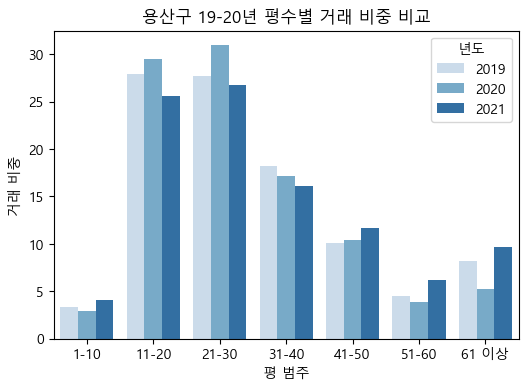

In [114]:
total_yongsan_melted = pd.melt(total_yongsan_pivot, id_vars='평 범주', var_name='년도', value_name='거래 비중')

# seaborn을 사용하여 시각화
plt.figure(figsize=(6, 4))
sns.barplot(x='평 범주', y='거래 비중', hue='년도', data=total_yongsan_melted,palette='Blues')
plt.title('용산구 19-20년 평수별 거래 비중 비교')
plt.savefig('용산구 19-20년 평수별 거래 비중 비교.png')
plt.show()

- 21-30평대 아파트의 비중이 26.8%로 가장 높고 그 다음으로 11-20평대 아파트가 25.5%로 높다.
- 40평대 이상 아파트의 거래 비중이 증가하는 추세이다.
- 31-40평대 아파트는 거래 비중이 줄어드는 추세이다.
- 반면, 60평대 이상 아파트는 거래 비중이 증가하는 추세이다.

-----

## 송파구

### 송파구 19,20,21년도 평수별 거래비중 증감률 비교

In [92]:
songpa = df[(df['지역명'] == '송파구') & ((df['거래년'] == 2019)| (df['거래년'] == 2020)| (df['거래년'] == 2021))]
songpa.reset_index(drop=True, inplace=True)
songpa

,지역명,법정동,거래년,평수,층,건축년도,거래금액,평당 가격
0,송파구,가락동,2019,25.6,11,1985,85000,3320.31
1,송파구,가락동,2019,18.1,16,1997,81000,4475.14
2,송파구,가락동,2019,25.7,8,2004,90000,3501.95
3,송파구,가락동,2019,23.2,2,2007,46500,2004.31
4,송파구,가락동,2019,18.1,17,1997,71500,3950.28
...,...,...,...,...,...,...,...,...
10966,송파구,마천동,2021,17.4,6,2015,45000,2586.21
10967,송파구,마천동,2021,17.4,5,2015,45000,2586.21
10968,송파구,마천동,2021,8.8,9,2017,51000,5795.45
10969,송파구,마천동,2021,25.6,1,1998,118000,4609.38


In [93]:
songpa_copy = songpa.copy()
songpa_copy['평 범주'] = pd.cut(songpa['평수'], bins=[0, 10, 20, 30, 40, 50, 60, 200],
       labels=['1-10','11-20', '21-30', '31-40', '41-50', '51-60', '61 이상'],
       right=True)
# sopngpa_copy.head()

count_per_category_year_total_songpa = songpa_copy.groupby(['거래년', '평 범주']).size().reset_index(name='거래 횟수')

mean_price_per_category_year_total_songpa = songpa_copy.groupby(['거래년', '평 범주'])['거래금액'].mean().reset_index(name='거래금액')

total_songpa = pd.merge(count_per_category_year_total_songpa, mean_price_per_category_year_total_songpa, on=['거래년', '평 범주'])

total_transactions_total_songpa = total_songpa.groupby('거래년')['거래 횟수'].sum()

total_songpa['거래 비중'] = total_songpa.apply(lambda row: row['거래 횟수'] / total_transactions_total_songpa[row['거래년']]*100, axis=1)
total_songpa = total_songpa.round(2)
total_songpa

,거래년,평 범주,거래 횟수,거래금액,거래 비중
0,2019,1-10,100,51160.90,1.73
1,2019,11-20,1503,82653.42,25.99
2,2019,21-30,2856,125572.55,49.39
3,2019,31-40,788,148260.18,13.63
4,2019,41-50,432,169188.66,7.47
5,2019,51-60,95,167434.74,1.64
6,2019,61 이상,8,128062.50,0.14
7,2020,1-10,98,56150.51,2.83
8,2020,11-20,1023,88185.62,29.52
9,2020,21-30,1530,136050.99,44.16


In [94]:
total_songpa_pivot = total_songpa.pivot(index='평 범주', columns='거래년', values='거래 비중').reset_index()
total_songpa_pivot

거래년,평 범주,2019,2020,2021
0,1-10,1.73,2.83,6.26
1,11-20,25.99,29.52,31.90
2,21-30,49.39,44.16,41.82
3,31-40,13.63,13.59,10.96
4,41-50,7.47,7.71,6.55
5,51-60,1.64,1.88,2.26
6,61 이상,0.14,0.32,0.23


#### 연도별 거래 비중 시각화

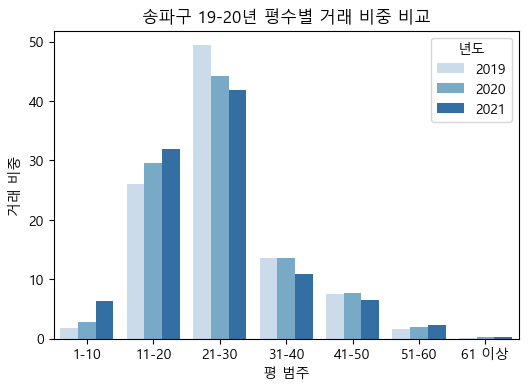

In [113]:
total_songpa_melted = pd.melt(total_songpa_pivot, id_vars='평 범주', var_name='년도', value_name='거래 비중')

# seaborn을 사용하여 시각화
plt.figure(figsize=(6, 4))
sns.barplot(x='평 범주', y='거래 비중', hue='년도', data=total_songpa_melted, palette='Blues')
plt.title('송파구 19-20년 평수별 거래 비중 비교')
plt.savefig('송파구 19-20년 평수별 거래 비중 비교.png')
plt.show()

- 21-30평대 아파트가 40%대로 가장 거래 비중이 높고 그 다음으로 11-20평대 아파트가 약 32%로 높다.
- 1-20평대 아파트의 거래 비중이 증가하는 추세이다.
- 21-30평대 아파트의 거래 비중은 19년 대비 22년 약 8% 가량 감소하였다.
- 21-50평대 아파트는 거래 비중이 줄어드는 추세이다.
- 반면, 50평대 이상 아파트는 거래 비중이 증가하는 추세이다.